# Basic data analysis
Do not run this notebook! Radiomics extraction results were really bad and cannot be exploited!!

In [4]:
import pandas as pd 
import csv
import pingouin
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

## Correlate Patient number and File Number 

In [5]:
# get all clinics file
clinics_file_path = "/mnt/c/Users/tachenne/delta-rad/Recueil clinique pancréas MRIdian.xls"
clinics_xls = pd.ExcelFile(clinics_file_path)
print(clinics_xls.sheet_names)
#clinics_df = xls.parse

['Patients', 'Dosi Volumes cibles ', 'Dosi OAR ', 'TTT', 'TTT OAR', 'Moyennes OAR ', 'Fin ttt', '1 mois ', '3 mois ', '6 mois ', '9 mois ', '1 an', '2 ans', 'Survies ']


In [6]:
# get patient list file (only patient numbers and ID ICM)
patient_file = "/mnt/c/Users/tachenne/delta-rad/Liste patients pancréas exports.xlsx"
patients_xlsx = pd.read_excel(patient_file, index_col=0)
patients_xlsx.head()

,Initiales,ID ICM,Notes,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Liste recueil clinique,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
Patient 1,CF,1403778.0,NaN,NaN,NaN,NaN,NaN,NaN,1403778.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient 2,CL,1906503.0,NaN,NaN,NaN,NaN,NaN,NaN,1906503.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient 3,CR,1904130.0,NaN,NaN,NaN,NaN,NaN,NaN,1904130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient 4,BK,1905976.0,NaN,NaN,NaN,NaN,NaN,NaN,1905976.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient 5,LJ,1904380.0,NaN,NaN,NaN,NaN,NaN,NaN,1907649.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
patients_xlsx.index

Index([ 'Patient 1',  'Patient 2',  'Patient 3',  'Patient 4',  'Patient 5',
        'Patient 6',  'Patient 7',  'Patient 8',  'Patient 9', 'Patient 10',
       'Patient 11', 'Patient 12', 'Patient 13', 'Patient 14', 'Patient 15',
       'Patient 16', 'Patient 17', 'Patient 18', 'Patient 19', 'Patient 20',
       'Patient 21', 'Patient 22', 'Patient 23', 'Patient 24', 'Patient 25',
       'Patient 26', 'Patient 27', 'Patient 28', 'Patient 29', 'Patient 30',
       'Patient 31', 'Patient 32', 'Patient 33', 'Patient 34', 'Patient 35',
       'Patient 36', 'Patient 37', 'Patient 38', 'Patient 39', 'Patient 40',
       'Patient 41', 'Patient 42', 'Patient 43', 'Patient 44', 'Patient 45',
       'Patient 46', 'Patient 47', 'Patient 48', 'Patient 49', 'Patient 50',
       'Patient 51', 'Patient 52', 'Patient 53', 'Patient 54', 'Patient 55',
       'Patient 56', 'Patient 57', 'Patient 58', 'Patient 59', 'Patient 60',
       'Patient 61', 'Patient 62', 'Patient 63', 'Patient 64', 'Patient 65',

In [8]:
patients_df = patients_xlsx[['ID ICM']]
patients_df.head()

,ID ICM
Patient 1,1403778.0
Patient 2,1906503.0
Patient 3,1904130.0
Patient 4,1905976.0
Patient 5,1904380.0


## Check that we have all values 

In [9]:
patients_list = patients_df.index.dropna()
print("Number of patients: ", len(patients_list))
pyrad_results_folder = "/mnt/c/Users/tachenne/delta-rad/Results GTV-PTV/"
misses_fraction = []
misses_gtv_ptv_row = []
for i in range(1, len(patients_list)+1):
    #print("Patient index:", i)
    filename = pyrad_results_folder + 'extractedFeaturePat' + str(i) + '.csv'
    extracted_feat_df = pd.read_csv(filename, sep =';', header=None, names=['ID', 'Image'])
    indexes = extracted_feat_df.index.dropna() # get index 
    if len(indexes) < 13:
        print("Error: miss one fraction for patient {}".format(i))
        misses_fraction.append((i, len(indexes)))

    elif len(indexes) < 25:
        #print("Error: miss PTV or GTV specific rows for patient {}".format(i))
        misses_gtv_ptv_row.append(i)

print("Patients ID who missed a fraction:", misses_fraction)
print("Number of patients with incomplete csv:", len(misses_fraction))
print("Patients ID which csv is not well made:", misses_gtv_ptv_row)



Number of patients:  86
Error: miss one fraction for patient 54
Error: miss one fraction for patient 56
Error: miss one fraction for patient 57
Error: miss one fraction for patient 61
Error: miss one fraction for patient 62
Error: miss one fraction for patient 63
Error: miss one fraction for patient 64
Error: miss one fraction for patient 66
Error: miss one fraction for patient 70
Error: miss one fraction for patient 71
Error: miss one fraction for patient 74
Error: miss one fraction for patient 79
Error: miss one fraction for patient 80
Error: miss one fraction for patient 81
Error: miss one fraction for patient 82
Error: miss one fraction for patient 84
Error: miss one fraction for patient 85
Error: miss one fraction for patient 86
Patients ID who missed a fraction: [(54, 11), (56, 11), (57, 11), (61, 11), (62, 11), (63, 11), (64, 11), (66, 9), (70, 11), (71, 12), (74, 7), (79, 11), (80, 7), (81, 11), (82, 11), (84, 11), (85, 11), (86, 11)]
Number of patients with incomplete csv: 18


In [10]:
features_list = [
    'original_shape_Elongation', 'original_shape_Flatness', 'original_shape_LeastAxisLength',
    'original_shape_MajorAxisLength', 'original_shape_Maximum2DDiameterColumn',
    'original_shape_Maximum2DDiameterRow', 'original_shape_Maximum2DDiameterSlice',
    'original_shape_Maximum3DDiameter', 'original_shape_MeshVolume',
    'original_shape_MinorAxisLength', 'original_shape_Sphericity',
    'original_shape_SurfaceArea', 'original_shape_SurfaceVolumeRatio',
    'original_shape_VoxelVolume', 'original_firstorder_10Percentile',
    'original_firstorder_90Percentile', 'original_firstorder_Energy',
    'original_firstorder_Entropy', 'original_firstorder_InterquartileRange',
    'original_firstorder_Kurtosis', 'original_firstorder_Maximum',
    'original_firstorder_MeanAbsoluteDeviation', 'original_firstorder_Mean',
    'original_firstorder_Median', 'original_firstorder_Minimum',
    'original_firstorder_Range', 'original_firstorder_RobustMeanAbsoluteDeviation',
    'original_firstorder_RootMeanSquared', 'original_firstorder_Skewness',
    'original_firstorder_TotalEnergy', 'original_firstorder_Uniformity',
    'original_firstorder_Variance', 'original_glcm_Autocorrelation',
    'original_glcm_ClusterProminence', 'original_glcm_ClusterShade',
    'original_glcm_ClusterTendency', 'original_glcm_Contrast',
    'original_glcm_Correlation', 'original_glcm_DifferenceAverage',
    'original_glcm_DifferenceEntropy', 'original_glcm_DifferenceVariance',
    'original_glcm_Id', 'original_glcm_Idm', 'original_glcm_Idmn', 'original_glcm_Idn',
    'original_glcm_Imc1', 'original_glcm_Imc2', 'original_glcm_InverseVariance',
    'original_glcm_JointAverage', 'original_glcm_JointEnergy',
    'original_glcm_JointEntropy', 'original_glcm_MCC', 'original_glcm_MaximumProbability',
    'original_glcm_SumAverage', 'original_glcm_SumEntropy', 'original_glcm_SumSquares',
    'original_glrlm_GrayLevelNonUniformity', 'original_glrlm_GrayLevelNonUniformityNormalized',
    'original_glrlm_GrayLevelVariance', 'original_glrlm_HighGrayLevelRunEmphasis',
    'original_glrlm_LongRunEmphasis', 'original_glrlm_LongRunHighGrayLevelEmphasis',
    'original_glrlm_LongRunLowGrayLevelEmphasis', 'original_glrlm_LowGrayLevelRunEmphasis',
    'original_glrlm_RunEntropy', 'original_glrlm_RunLengthNonUniformity',
    'original_glrlm_RunLengthNonUniformityNormalized', 'original_glrlm_RunPercentage',
    'original_glrlm_RunVariance', 'original_glrlm_ShortRunEmphasis',
    'original_glrlm_ShortRunHighGrayLevelEmphasis', 'original_glrlm_ShortRunLowGrayLevelEmphasis',
    'original_glszm_GrayLevelNonUniformity', 'original_glszm_GrayLevelNonUniformityNormalized',
    'original_glszm_GrayLevelVariance', 'original_glszm_HighGrayLevelZoneEmphasis',
    'original_glszm_LargeAreaEmphasis', 'original_glszm_LargeAreaHighGrayLevelEmphasis',
    'original_glszm_LargeAreaLowGrayLevelEmphasis', 'original_glszm_LowGrayLevelZoneEmphasis',
    'original_glszm_SizeZoneNonUniformity', 'original_glszm_SizeZoneNonUniformityNormalized',
    'original_glszm_SmallAreaEmphasis', 'original_glszm_SmallAreaHighGrayLevelEmphasis',
    'original_glszm_SmallAreaLowGrayLevelEmphasis', 'original_glszm_ZoneEntropy',
    'original_glszm_ZonePercentage', 'original_glszm_ZoneVariance',
    'original_gldm_DependenceEntropy', 'original_gldm_DependenceNonUniformity',
    'original_gldm_DependenceNonUniformityNormalized', 'original_gldm_DependenceVariance',
    'original_gldm_GrayLevelNonUniformity', 'original_gldm_GrayLevelVariance',
    'original_gldm_HighGrayLevelEmphasis', 'original_gldm_LargeDependenceEmphasis',
    'original_gldm_LargeDependenceHighGrayLevelEmphasis',
    'original_gldm_LargeDependenceLowGrayLevelEmphasis',
    'original_gldm_LowGrayLevelEmphasis', 'original_gldm_SmallDependenceEmphasis',
    'original_gldm_SmallDependenceHighGrayLevelEmphasis',
    'original_gldm_SmallDependenceLowGrayLevelEmphasis', 'original_ngtdm_Busyness',
    'original_ngtdm_Coarseness', 'original_ngtdm_Complexity', 'original_ngtdm_Contrast',
    'original_ngtdm_Strength'
]

In [11]:
other_info = [
    "diagnostics_Versions_PyRadiomics",
    "diagnostics_Versions_Numpy",
    "diagnostics_Versions_SimpleITK",
    "diagnostics_Versions_PyWavelet",
    "diagnostics_Versions_Python",
    "diagnostics_Configuration_Settings",
    "diagnostics_Configuration_EnabledImageTypes",
    "diagnostics_Image-original_Hash",
    "diagnostics_Image-original_Dimensionality",
    "diagnostics_Image-original_Spacing",
    "diagnostics_Image-original_Size",
    "diagnostics_Image-original_Mean",
    "diagnostics_Image-original_Minimum",
    "diagnostics_Image-original_Maximum",
    "diagnostics_Mask-original_Hash",
    "diagnostics_Mask-original_Spacing",
    "diagnostics_Mask-original_Size",
    "diagnostics_Mask-original_BoundingBox",
    "diagnostics_Mask-original_VoxelNum",
    "diagnostics_Mask-original_VolumeNum",
    "diagnostics_Mask-original_CenterOfMassIndex",
    "diagnostics_Mask-original_CenterOfMass",
    "diagnostics_Image-interpolated_Spacing",
    "diagnostics_Image-interpolated_Size",
    "diagnostics_Image-interpolated_Mean",
    "diagnostics_Image-interpolated_Minimum",
    "diagnostics_Image-interpolated_Maximum",
    "diagnostics_Mask-interpolated_Spacing",
    "diagnostics_Mask-interpolated_Size",
    "diagnostics_Mask-interpolated_BoundingBox",
    "diagnostics_Mask-interpolated_VoxelNum",
    "diagnostics_Mask-interpolated_VolumeNum",
    "diagnostics_Mask-interpolated_CenterOfMassIndex",
    "diagnostics_Mask-interpolated_CenterOfMass",
    "diagnostics_Mask-interpolated_Mean",
    "diagnostics_Mask-interpolated_Minimum",
    "diagnostics_Mask-interpolated_Maximum",
    "diagnostics_Mask-resegmented_Spacing",
    "diagnostics_Mask-resegmented_Size",
    "diagnostics_Mask-resegmented_BoundingBox",
    "diagnostics_Mask-resegmented_VoxelNum",
    "diagnostics_Mask-resegmented_VolumeNum",
    "diagnostics_Mask-resegmented_CenterOfMassIndex",
    "diagnostics_Mask-resegmented_CenterOfMass",
    "diagnostics_Mask-resegmented_Mean",
    "diagnostics_Mask-resegmented_Minimum",
    "diagnostics_Mask-resegmented_Maximum"
]

In [12]:
# define dataframe columns
names = ['ID', 'Image', 'Mask'] + other_info + features_list
print(names)

['ID', 'Image', 'Mask', 'diagnostics_Versions_PyRadiomics', 'diagnostics_Versions_Numpy', 'diagnostics_Versions_SimpleITK', 'diagnostics_Versions_PyWavelet', 'diagnostics_Versions_Python', 'diagnostics_Configuration_Settings', 'diagnostics_Configuration_EnabledImageTypes', 'diagnostics_Image-original_Hash', 'diagnostics_Image-original_Dimensionality', 'diagnostics_Image-original_Spacing', 'diagnostics_Image-original_Size', 'diagnostics_Image-original_Mean', 'diagnostics_Image-original_Minimum', 'diagnostics_Image-original_Maximum', 'diagnostics_Mask-original_Hash', 'diagnostics_Mask-original_Spacing', 'diagnostics_Mask-original_Size', 'diagnostics_Mask-original_BoundingBox', 'diagnostics_Mask-original_VoxelNum', 'diagnostics_Mask-original_VolumeNum', 'diagnostics_Mask-original_CenterOfMassIndex', 'diagnostics_Mask-original_CenterOfMass', 'diagnostics_Image-interpolated_Spacing', 'diagnostics_Image-interpolated_Size', 'diagnostics_Image-interpolated_Mean', 'diagnostics_Image-interpolate

In [13]:
# define columns of simu/F1 delta rad next dataframe 
new_feature_list = ['delta_f1_f2_gtv_' + x for x in features_list]
print(new_feature_list)

['delta_f1_f2_gtv_original_shape_Elongation', 'delta_f1_f2_gtv_original_shape_Flatness', 'delta_f1_f2_gtv_original_shape_LeastAxisLength', 'delta_f1_f2_gtv_original_shape_MajorAxisLength', 'delta_f1_f2_gtv_original_shape_Maximum2DDiameterColumn', 'delta_f1_f2_gtv_original_shape_Maximum2DDiameterRow', 'delta_f1_f2_gtv_original_shape_Maximum2DDiameterSlice', 'delta_f1_f2_gtv_original_shape_Maximum3DDiameter', 'delta_f1_f2_gtv_original_shape_MeshVolume', 'delta_f1_f2_gtv_original_shape_MinorAxisLength', 'delta_f1_f2_gtv_original_shape_Sphericity', 'delta_f1_f2_gtv_original_shape_SurfaceArea', 'delta_f1_f2_gtv_original_shape_SurfaceVolumeRatio', 'delta_f1_f2_gtv_original_shape_VoxelVolume', 'delta_f1_f2_gtv_original_firstorder_10Percentile', 'delta_f1_f2_gtv_original_firstorder_90Percentile', 'delta_f1_f2_gtv_original_firstorder_Energy', 'delta_f1_f2_gtv_original_firstorder_Entropy', 'delta_f1_f2_gtv_original_firstorder_InterquartileRange', 'delta_f1_f2_gtv_original_firstorder_Kurtosis', '

In [14]:
patients_list = patients_df.index.dropna()
print("Number of patients: ", len(patients_list))
pyrad_results_folder = "/mnt/c/Users/tachenne/delta-rad/Results GTV-PTV/"

# list of patients who have MRIdian written instead of mridian
MRI_issue_patients = list(range(4, 8))
MRI_issue_patients = MRI_issue_patients + [26]
print(MRI_issue_patients)

# list of patients who have ',' as separator instead of ';' 
comma_separator_patients = list(range(68, 87))
print(comma_separator_patients)

# list of patients without mridian simulation 
no_simu_patients = [17, 18, 19, 21, 22, 23, 24, 32, 66]

# list of patients who have ',' instead of '.' 
#  we want point to recreate the floats then 
comma_patients = list(range(1, 40))


Number of patients:  86
[4, 5, 6, 7, 26]
[68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86]


## Stability check 
Let's compute Lin’s Concordance Correlation Coefficient (CCC) between simu MRIdian and F1 when available. 

### GTV

In [15]:
pearson_ccc_df = pd.DataFrame(index=patients_list)

for i in range(1, len(patients_list)+1):
    csv_path = pyrad_results_folder + 'extractedFeaturePat' + str(i) + '.csv'
    if i < 10: 
        patient_index = '0' + str(i)
    elif i >= 10: 
        patient_index = str(i) 

    if i in MRI_issue_patients: 
    # change row_to_extract1 str 
        row_to_extract1 = 'Data/Patient' + patient_index + '/mask_dir/Patient' + patient_index + '_IRM_simu_MRIdian_gtv.nii'
    elif i not in MRI_issue_patients: 
        row_to_extract1 = 'Data/Patient' + patient_index + '/mask_dir/Patient' + patient_index + '_IRM_simu_mridian_gtv.nii'

    if i in comma_separator_patients: 
        # open csv with ',' as separator 
        df = pd.read_csv(csv_path, sep =',', header=None, names=names)
    elif i not in comma_separator_patients: 
        # open csv with ';' as separator 
        df = pd.read_csv(csv_path, sep =';', header=None, names=names)
    row_to_extract2 = 'Data/Patient' + patient_index + '/mask_dir/Patient' + patient_index + '_mridian_ttt_1_gtv.nii'

    if i not in no_simu_patients:
        try: 
            simu_features_df = df.loc[df['Mask'] == row_to_extract1, features_list].iloc[0]
            f1_features_df = df.loc[df['Mask'] == row_to_extract2, features_list].iloc[0]
            pearson_ccc = pingouin.corr(simu_features_df.astype(float), f1_features_df.astype(float), method='pearson') # change values to float 

            pearson_ccc_df.loc[patients_list[i-1], 'Corr'] = pearson_ccc['r'][0]
            pearson_ccc_df.loc[patients_list[i-1], 'p-value'] = pearson_ccc['p-val'][0]
             
        except IndexError: 
            print("Error for patient ", i )

        # print(simu_features_df.isnull().values.any(), f1_features_df.isnull().values.any()) # check nan values 



    

Error for patient  38
Error for patient  57
Error for patient  80


In [16]:
pearson_ccc_df

,Corr,p-value
Patient 1,1.0,0.0
Patient 2,1.0,0.0
Patient 3,1.0,0.0
Patient 4,1.0,0.0
Patient 5,1.0,0.0
...,...,...
Patient 82,1.0,0.0
Patient 83,1.0,0.0
Patient 84,1.0,0.0
Patient 85,1.0,0.0


In [17]:
# print patients for which correlation is not 1
non_1_ccc = pearson_ccc_df[(pearson_ccc_df['Corr'] != 1.0) & (pearson_ccc_df['Corr'].abs() < 0.99)]
print(non_1_ccc.index)
 

Index([], dtype='object')


All the patients have 1 correlation between simu and F1!!

## F2/F1 DR ratio on GTV

In [18]:
def replace_commas_in_csv(csv_path: str): 
    # Open the input file
    with open(csv_path, 'r') as infile:
        # Read the entire content
        content = infile.read()

    # Replace commas outside quotes with periods
    content = content.replace(',', '.', content.count(',') - content.count('"') + 1)

    # Write the modified content to a new file
    with open(csv_path, 'w') as outfile:
        outfile.write(content)

# replace_commas_in_csv("/mnt/c/Users/tachenne/delta-rad/Results GTV-PTV/extractedFeaturePat1.csv")

In [19]:
def get_data_from_csv(name_exam1: str, name_exam2: str, patients_list: list, pyrad_results_folder: str = "/mnt/c/Users/tachenne/delta-rad/Results GTV-PTV/"): 
    ''' Obtains delta-radiomics data for all patients of the csv between 2 specified exams.'''

    # Créer une liste vide pour stocker les données
    data = []
    error_patients = []

    # Ajouter les données pour chaque patient
    for i in range(1, len(patients_list)+1):
        csv_path = pyrad_results_folder + 'extractedFeaturePat' + str(i) + '.csv'
        
        if i < 10: 
            patient_index = '0' + str(i)
        elif i >= 10: 
            patient_index = str(i) 

        if i in MRI_issue_patients: 
            # change row_to_extract1 str 
            pass 
        if i in comma_patients: # replace commas by points 
            replace_commas_in_csv(csv_path)

        if i in comma_separator_patients: 
            # open csv with ',' as separator 
            extracted_feat_df = pd.read_csv(csv_path, sep =',', header=None, names=names)
        elif i not in comma_separator_patients: 
            # open csv with ';' as separator 
            extracted_feat_df = pd.read_csv(csv_path, sep =';', header=None, names=names)

        row_to_extract1 = 'Data/Patient' + patient_index + '/mask_dir/Patient' + patient_index + name_exam1
        row_to_extract2 = 'Data/Patient' + patient_index + '/mask_dir/Patient' + patient_index + name_exam2

        # if i > 70: 
        #     print(extracted_feat_df['Mask'].values, row_to_extract1)


        row_data = []
        for feature in features_list:
            if (row_to_extract1 in extracted_feat_df['Mask'].astype(str).values) and (row_to_extract2 in extracted_feat_df['Mask'].astype(str).values):
                feature_value1 = float(extracted_feat_df.loc[extracted_feat_df['Mask'] == row_to_extract1, feature].iloc[0].replace(',', '.')) # read feature at simu gtv row 
                feature_value2 = float(extracted_feat_df.loc[extracted_feat_df['Mask'] == row_to_extract2, feature].iloc[0].replace(',', '.')) # read feature at f1 gtv row 
                delta_feature = feature_value2 / feature_value1 # compute the difference 
                row_data.append(delta_feature) # add the value to raw_data 

            else: 
                row_data.append(None)
                if patient_index not in error_patients: 
                    error_patients.append(patient_index)

        data.append(row_data)

    return data, error_patients

In [20]:
# Créer le DataFrame
data_bis, error_patients = get_data_from_csv('_mridian_ttt_1_gtv.nii', '_mridian_ttt_2_gtv.nii', patients_list, pyrad_results_folder)
#data.extend(data_bis)
print("Patient indexes with errors: ", error_patients)

delta_f1_f2_gtv_df = pd.DataFrame(data_bis, index=patients_list, columns=new_feature_list)


Patient indexes with errors:  ['38', '62', '74', '80', '82', '84', '85']


Analysis: \
Patients without GTV: 38
Patients without F2: 32, 74, 80, 82, 84, 85. Patient 74 has only F1/F5 and patient 80 only F3/F5. 

These patients do not have simulation!!

In [21]:
delta_f1_f2_gtv_df


,delta_f1_f2_gtv_original_shape_Elongation,delta_f1_f2_gtv_original_shape_Flatness,delta_f1_f2_gtv_original_shape_LeastAxisLength,delta_f1_f2_gtv_original_shape_MajorAxisLength,delta_f1_f2_gtv_original_shape_Maximum2DDiameterColumn,delta_f1_f2_gtv_original_shape_Maximum2DDiameterRow,delta_f1_f2_gtv_original_shape_Maximum2DDiameterSlice,delta_f1_f2_gtv_original_shape_Maximum3DDiameter,delta_f1_f2_gtv_original_shape_MeshVolume,delta_f1_f2_gtv_original_shape_MinorAxisLength,...,delta_f1_f2_gtv_original_gldm_LargeDependenceLowGrayLevelEmphasis,delta_f1_f2_gtv_original_gldm_LowGrayLevelEmphasis,delta_f1_f2_gtv_original_gldm_SmallDependenceEmphasis,delta_f1_f2_gtv_original_gldm_SmallDependenceHighGrayLevelEmphasis,delta_f1_f2_gtv_original_gldm_SmallDependenceLowGrayLevelEmphasis,delta_f1_f2_gtv_original_ngtdm_Busyness,delta_f1_f2_gtv_original_ngtdm_Coarseness,delta_f1_f2_gtv_original_ngtdm_Complexity,delta_f1_f2_gtv_original_ngtdm_Contrast,delta_f1_f2_gtv_original_ngtdm_Strength
Patient 1,1.014941,1.007437,0.997437,0.990073,1.000000,0.999445,1.00000,1.000000,0.974812,1.004866,...,1.231458,1.125222,0.948681,0.906856,1.026439,1.044542,1.056894,0.923689,0.967051,1.039938
Patient 2,1.022583,1.013365,1.014727,1.001344,0.965146,1.061754,1.51633,1.062004,1.200080,1.023958,...,0.968780,0.945478,1.026853,1.177369,0.881797,1.097394,0.816943,1.357430,1.140035,0.997580
Patient 3,0.999619,1.007396,1.008446,1.001043,1.000000,1.000000,1.00000,1.000000,1.012344,1.000661,...,0.435857,0.543926,1.189780,1.773478,0.611839,0.565735,0.970953,2.094103,0.946169,1.842470
Patient 4,0.979307,0.953720,0.969270,1.016305,1.020031,1.011843,1.00000,1.000998,0.978891,0.995274,...,0.964360,1.006196,0.952117,0.895245,1.065067,0.871305,1.008133,1.099968,0.834474,1.163716
Patient 5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,0.975421,0.935075,1.050566,1.092107,1.049588,0.964561,1.017974,0.993127,0.994376,1.022419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Patient 82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient 83,0.986950,0.987900,1.001420,1.013685,1.022546,1.003546,1.00000,1.014762,1.007689,1.000456,...,0.400748,0.457971,1.136344,1.687056,0.525817,0.629312,0.945280,1.560138,0.871742,1.297702
Patient 84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient 85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### sauvegarder tableau avec valeurs manquantes

In [22]:
delta_f1_f2_gtv_df.to_csv(pyrad_results_folder+'ratio_f2_f1_gtv_with_nan.csv')

### remplacer les valeurs NaN par valeurs moyennes de la colonne 

In [23]:
delta_f1_f2_gtv_df.isnull().sum()

delta_f1_f2_gtv_original_shape_Elongation                 7
delta_f1_f2_gtv_original_shape_Flatness                   7
delta_f1_f2_gtv_original_shape_LeastAxisLength            7
delta_f1_f2_gtv_original_shape_MajorAxisLength            7
delta_f1_f2_gtv_original_shape_Maximum2DDiameterColumn    7
                                                         ..
delta_f1_f2_gtv_original_ngtdm_Busyness                   7
delta_f1_f2_gtv_original_ngtdm_Coarseness                 7
delta_f1_f2_gtv_original_ngtdm_Complexity                 7
delta_f1_f2_gtv_original_ngtdm_Contrast                   7
delta_f1_f2_gtv_original_ngtdm_Strength                   7
Length: 107, dtype: int64

In [24]:
delta_f1_f2_gtv_mean_added_df = delta_f1_f2_gtv_df.fillna(delta_f1_f2_gtv_df.mean())
delta_f1_f2_gtv_mean_added_df


,delta_f1_f2_gtv_original_shape_Elongation,delta_f1_f2_gtv_original_shape_Flatness,delta_f1_f2_gtv_original_shape_LeastAxisLength,delta_f1_f2_gtv_original_shape_MajorAxisLength,delta_f1_f2_gtv_original_shape_Maximum2DDiameterColumn,delta_f1_f2_gtv_original_shape_Maximum2DDiameterRow,delta_f1_f2_gtv_original_shape_Maximum2DDiameterSlice,delta_f1_f2_gtv_original_shape_Maximum3DDiameter,delta_f1_f2_gtv_original_shape_MeshVolume,delta_f1_f2_gtv_original_shape_MinorAxisLength,...,delta_f1_f2_gtv_original_gldm_LargeDependenceLowGrayLevelEmphasis,delta_f1_f2_gtv_original_gldm_LowGrayLevelEmphasis,delta_f1_f2_gtv_original_gldm_SmallDependenceEmphasis,delta_f1_f2_gtv_original_gldm_SmallDependenceHighGrayLevelEmphasis,delta_f1_f2_gtv_original_gldm_SmallDependenceLowGrayLevelEmphasis,delta_f1_f2_gtv_original_ngtdm_Busyness,delta_f1_f2_gtv_original_ngtdm_Coarseness,delta_f1_f2_gtv_original_ngtdm_Complexity,delta_f1_f2_gtv_original_ngtdm_Contrast,delta_f1_f2_gtv_original_ngtdm_Strength
Patient 1,1.014941,1.007437,0.997437,0.990073,1.000000,0.999445,1.000000,1.000000,0.974812,1.004866,...,1.231458,1.125222,0.948681,0.906856,1.026439,1.044542,1.056894,0.923689,0.967051,1.039938
Patient 2,1.022583,1.013365,1.014727,1.001344,0.965146,1.061754,1.516330,1.062004,1.200080,1.023958,...,0.968780,0.945478,1.026853,1.177369,0.881797,1.097394,0.816943,1.357430,1.140035,0.997580
Patient 3,0.999619,1.007396,1.008446,1.001043,1.000000,1.000000,1.000000,1.000000,1.012344,1.000661,...,0.435857,0.543926,1.189780,1.773478,0.611839,0.565735,0.970953,2.094103,0.946169,1.842470
Patient 4,0.979307,0.953720,0.969270,1.016305,1.020031,1.011843,1.000000,1.000998,0.978891,0.995274,...,0.964360,1.006196,0.952117,0.895245,1.065067,0.871305,1.008133,1.099968,0.834474,1.163716
Patient 5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.975421,0.935075,1.050566,1.092107,1.049588,0.964561,1.017974,0.993127,0.994376,1.022419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Patient 82,1.026743,1.005707,0.992033,0.991316,0.992231,0.993270,1.008719,0.994756,0.989722,1.004764,...,1.119183,1.053509,1.004185,1.034331,1.048586,1.037754,1.024039,1.075896,1.041094,1.115809
Patient 83,0.986950,0.987900,1.001420,1.013685,1.022546,1.003546,1.000000,1.014762,1.007689,1.000456,...,0.400748,0.457971,1.136344,1.687056,0.525817,0.629312,0.945280,1.560138,0.871742,1.297702
Patient 84,1.026743,1.005707,0.992033,0.991316,0.992231,0.993270,1.008719,0.994756,0.989722,1.004764,...,1.119183,1.053509,1.004185,1.034331,1.048586,1.037754,1.024039,1.075896,1.041094,1.115809
Patient 85,1.026743,1.005707,0.992033,0.991316,0.992231,0.993270,1.008719,0.994756,0.989722,1.004764,...,1.119183,1.053509,1.004185,1.034331,1.048586,1.037754,1.024039,1.075896,1.041094,1.115809


### save table with NaN replaced by mean values

In [25]:
delta_f1_f2_gtv_mean_added_df.to_csv(pyrad_results_folder+'ratio_f2_f1_gtv.csv')

### Assess multi-collinearity

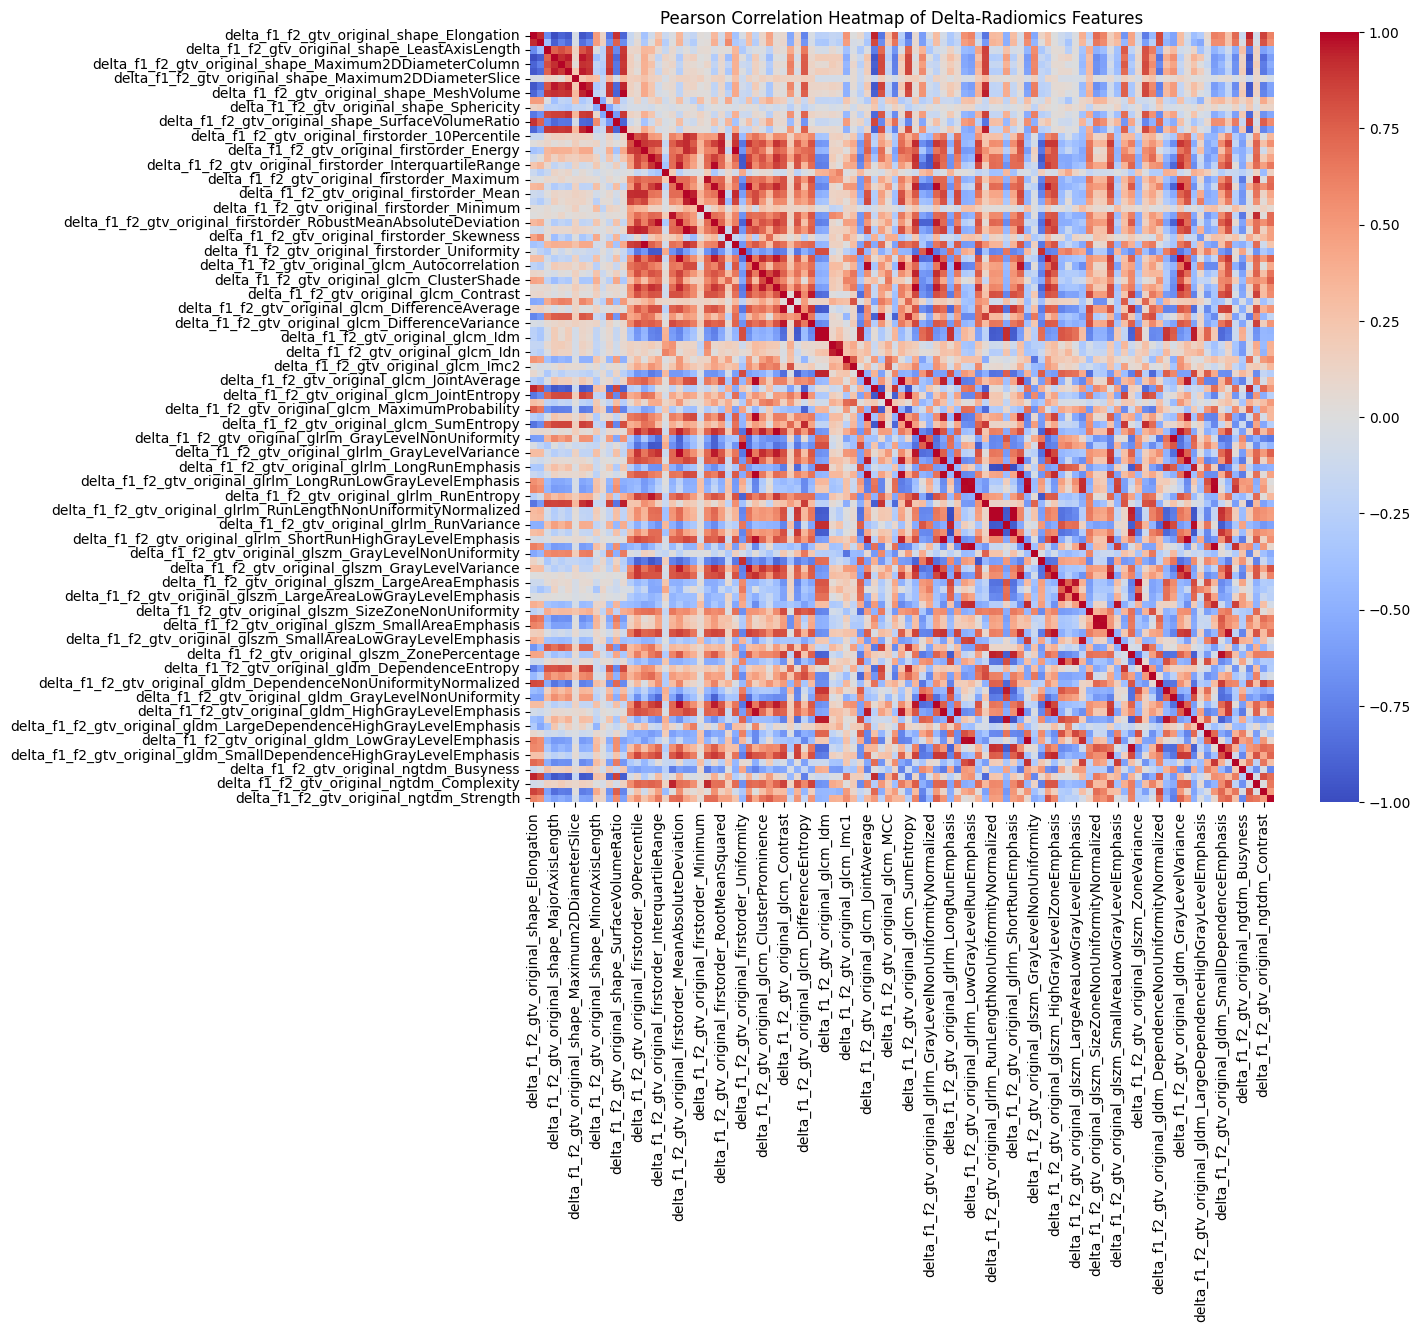

In [55]:
def disp_pearson_corr(delta_rad_df):    
    correlation_matrix = delta_rad_df.corr(method='pearson')
    # Plot heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
    plt.title("Pearson Correlation Heatmap of Delta-Radiomics Features")
    plt.show()

    return correlation_matrix

delta_f1_f2_gtv_correlation_matrix = disp_pearson_corr(delta_f1_f2_gtv_mean_added_df)

### Identify Highly Correlated Features

In [58]:
def get_highly_corr_features(correlation_matrix, threshold=0.9):
    # Find pairs of highly correlated features
    highly_correlated_pairs = [
        (column1, column2, correlation_matrix.loc[column1, column2])
        for column1 in correlation_matrix.columns
        for column2 in correlation_matrix.columns
        if (column1 != column2) and (abs(correlation_matrix.loc[column1, column2]) > threshold)
    ]

    print("There are {} highly correlated features (correlation superior to {}): ".format(len(highly_correlated_pairs), threshold))

    # Display highly correlated pairs
    for column1, column2, corr_value in highly_correlated_pairs:
        print(f"{column1} and {column2} have a correlation of {corr_value:.2f}")

    return highly_correlated_pairs

delta_f1_f2_gtv_highly_correlated_pairs = get_highly_corr_features(delta_f1_f2_gtv_correlation_matrix)


There are 416 highly correlated features (correlation superior to 0.9): 
delta_f1_f2_gtv_original_shape_Elongation and delta_f1_f2_gtv_original_shape_Flatness have a correlation of 0.92
delta_f1_f2_gtv_original_shape_Elongation and delta_f1_f2_gtv_original_shape_MajorAxisLength have a correlation of -0.99
delta_f1_f2_gtv_original_shape_Elongation and delta_f1_f2_gtv_original_shape_Maximum2DDiameterRow have a correlation of -0.94
delta_f1_f2_gtv_original_shape_Elongation and delta_f1_f2_gtv_original_shape_Maximum3DDiameter have a correlation of -0.95
delta_f1_f2_gtv_original_shape_Elongation and delta_f1_f2_gtv_original_shape_SurfaceVolumeRatio have a correlation of 0.90
delta_f1_f2_gtv_original_shape_Elongation and delta_f1_f2_gtv_original_glcm_JointEnergy have a correlation of 0.94
delta_f1_f2_gtv_original_shape_Elongation and delta_f1_f2_gtv_original_ngtdm_Coarseness have a correlation of 0.94
delta_f1_f2_gtv_original_shape_Flatness and delta_f1_f2_gtv_original_shape_Elongation have 

### Drop highly correlated features 


In [59]:
def remove_highly_corr_features(highly_correlated_pairs, original_df):    
    # Remove one feature from each highly correlated pair
    to_drop = set()
    for column1, column2, _ in highly_correlated_pairs:
        if column1 not in to_drop and column2 not in to_drop:
            to_drop.add(column2)  # Keep column1, drop column2

    print("{} features dropped. ".format(len(to_drop)))

    # Drop features
    reduced_df = original_df.drop(columns=to_drop)
    print(f"Reduced DataFrame has {reduced_df.shape[1]} features.")

    return reduced_df 

delta_f1_f2_gtv_mean_added_df_reduced = remove_highly_corr_features(delta_f1_f2_gtv_highly_correlated_pairs, delta_f1_f2_gtv_mean_added_df)


55 features dropped. 
Reduced DataFrame has 52 features.


## F1/F3 ratio on GTV 

In [27]:
# define columns of simu/F1 delta rad next dataframe 
new_feature_list = ['delta_f1_f3_gtv_' + x for x in features_list]
print(new_feature_list)

['delta_f1_f3_gtv_original_shape_Elongation', 'delta_f1_f3_gtv_original_shape_Flatness', 'delta_f1_f3_gtv_original_shape_LeastAxisLength', 'delta_f1_f3_gtv_original_shape_MajorAxisLength', 'delta_f1_f3_gtv_original_shape_Maximum2DDiameterColumn', 'delta_f1_f3_gtv_original_shape_Maximum2DDiameterRow', 'delta_f1_f3_gtv_original_shape_Maximum2DDiameterSlice', 'delta_f1_f3_gtv_original_shape_Maximum3DDiameter', 'delta_f1_f3_gtv_original_shape_MeshVolume', 'delta_f1_f3_gtv_original_shape_MinorAxisLength', 'delta_f1_f3_gtv_original_shape_Sphericity', 'delta_f1_f3_gtv_original_shape_SurfaceArea', 'delta_f1_f3_gtv_original_shape_SurfaceVolumeRatio', 'delta_f1_f3_gtv_original_shape_VoxelVolume', 'delta_f1_f3_gtv_original_firstorder_10Percentile', 'delta_f1_f3_gtv_original_firstorder_90Percentile', 'delta_f1_f3_gtv_original_firstorder_Energy', 'delta_f1_f3_gtv_original_firstorder_Entropy', 'delta_f1_f3_gtv_original_firstorder_InterquartileRange', 'delta_f1_f3_gtv_original_firstorder_Kurtosis', '

In [28]:
# Créer le DataFrame
data, error_patients = get_data_from_csv('_mridian_ttt_1_gtv.nii', '_mridian_ttt_3_gtv.nii', patients_list, pyrad_results_folder)
print("Patient indexes with errors: ", error_patients)

delta_f1_f3_gtv_df = pd.DataFrame(data, index=patients_list, columns=new_feature_list)

Patient indexes with errors:  ['38', '56', '63', '74', '80']


In [29]:
delta_f1_f3_gtv_df

,delta_f1_f3_gtv_original_shape_Elongation,delta_f1_f3_gtv_original_shape_Flatness,delta_f1_f3_gtv_original_shape_LeastAxisLength,delta_f1_f3_gtv_original_shape_MajorAxisLength,delta_f1_f3_gtv_original_shape_Maximum2DDiameterColumn,delta_f1_f3_gtv_original_shape_Maximum2DDiameterRow,delta_f1_f3_gtv_original_shape_Maximum2DDiameterSlice,delta_f1_f3_gtv_original_shape_Maximum3DDiameter,delta_f1_f3_gtv_original_shape_MeshVolume,delta_f1_f3_gtv_original_shape_MinorAxisLength,...,delta_f1_f3_gtv_original_gldm_LargeDependenceLowGrayLevelEmphasis,delta_f1_f3_gtv_original_gldm_LowGrayLevelEmphasis,delta_f1_f3_gtv_original_gldm_SmallDependenceEmphasis,delta_f1_f3_gtv_original_gldm_SmallDependenceHighGrayLevelEmphasis,delta_f1_f3_gtv_original_gldm_SmallDependenceLowGrayLevelEmphasis,delta_f1_f3_gtv_original_ngtdm_Busyness,delta_f1_f3_gtv_original_ngtdm_Coarseness,delta_f1_f3_gtv_original_ngtdm_Complexity,delta_f1_f3_gtv_original_ngtdm_Contrast,delta_f1_f3_gtv_original_ngtdm_Strength
Patient 1,1.014941,1.007437,0.997437,0.990073,1.000000,0.999445,1.000000,1.000000,0.974812,1.004866,...,1.275636,1.195809,0.931180,0.870636,1.278927,1.127164,1.035660,0.862791,0.949992,0.992781
Patient 2,0.975817,1.066902,1.071429,1.004243,0.880190,1.029280,1.505874,1.067484,1.132695,0.979957,...,0.985818,0.891832,0.976450,0.991037,0.803955,1.602349,0.854726,0.744683,1.305348,0.572717
Patient 3,0.999558,1.007662,1.008824,1.001153,1.000000,1.000000,1.000000,1.000000,1.012682,1.000710,...,1.112217,1.065614,1.025678,1.015162,1.083980,0.874930,0.986818,1.360101,0.893043,1.482645
Patient 4,1.008485,1.005581,0.998871,0.993328,1.000000,1.000000,0.983969,0.984099,0.989905,1.001756,...,0.876515,1.132833,1.040069,1.036722,1.225806,0.942985,0.959569,1.265251,1.041362,1.086287
Patient 5,1.019726,0.975292,0.983426,1.008339,1.027540,0.993270,1.000000,1.000000,0.990713,1.028229,...,0.785218,0.880423,1.200435,1.670926,1.016615,0.765081,1.044498,1.669990,1.304298,1.561757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Patient 82,1.000913,1.002655,0.999809,0.997162,1.000000,1.000000,1.000000,1.000000,0.994674,0.998072,...,0.683858,0.874050,1.076547,1.261845,1.040357,0.775625,1.046732,1.369287,0.960232,1.457171
Patient 83,0.986950,0.987900,1.001420,1.013685,1.022546,1.003546,1.000000,1.014762,1.007689,1.000456,...,0.504633,0.549901,1.018384,1.318007,0.590192,0.794336,0.973706,0.978097,0.969623,0.837740
Patient 84,1.005607,1.000549,0.997687,0.997140,1.000000,1.000000,1.000000,1.000000,0.996233,1.002731,...,0.418189,0.568140,1.125117,1.312844,0.664588,0.732221,0.942505,1.424969,0.893695,1.240264
Patient 85,0.981883,0.988272,1.011383,1.023385,1.000000,1.022388,1.000000,1.013484,1.036690,1.004844,...,0.855520,0.648277,0.883717,1.048164,0.526146,0.690524,1.029637,1.262097,0.675161,1.632308


Patients 56, 63, 74 have no F3 
Patient 38 has no GTV 
Patient 80 has no F1 

In [30]:
delta_f1_f3_gtv_df.to_csv(pyrad_results_folder+'ratio_f3_f1_gtv_with_nan.csv') # Save table with NaN values 

In [31]:
delta_f1_f3_gtv_df.isnull().sum() # observe nan values

delta_f1_f3_gtv_original_shape_Elongation                 5
delta_f1_f3_gtv_original_shape_Flatness                   5
delta_f1_f3_gtv_original_shape_LeastAxisLength            5
delta_f1_f3_gtv_original_shape_MajorAxisLength            5
delta_f1_f3_gtv_original_shape_Maximum2DDiameterColumn    5
                                                         ..
delta_f1_f3_gtv_original_ngtdm_Busyness                   5
delta_f1_f3_gtv_original_ngtdm_Coarseness                 5
delta_f1_f3_gtv_original_ngtdm_Complexity                 5
delta_f1_f3_gtv_original_ngtdm_Contrast                   5
delta_f1_f3_gtv_original_ngtdm_Strength                   5
Length: 107, dtype: int64

In [32]:
delta_f1_f3_gtv_mean_added_df = delta_f1_f3_gtv_df.fillna(delta_f1_f3_gtv_df.mean()) # replace nan values by mean of the column 
delta_f1_f3_gtv_mean_added_df.isnull().values.any()

False

In [33]:
delta_f1_f3_gtv_mean_added_df.to_csv(pyrad_results_folder+'ratio_f3_f1_gtv.csv') # save table with NaN replaced by mean values

### Assess multi-collinearity

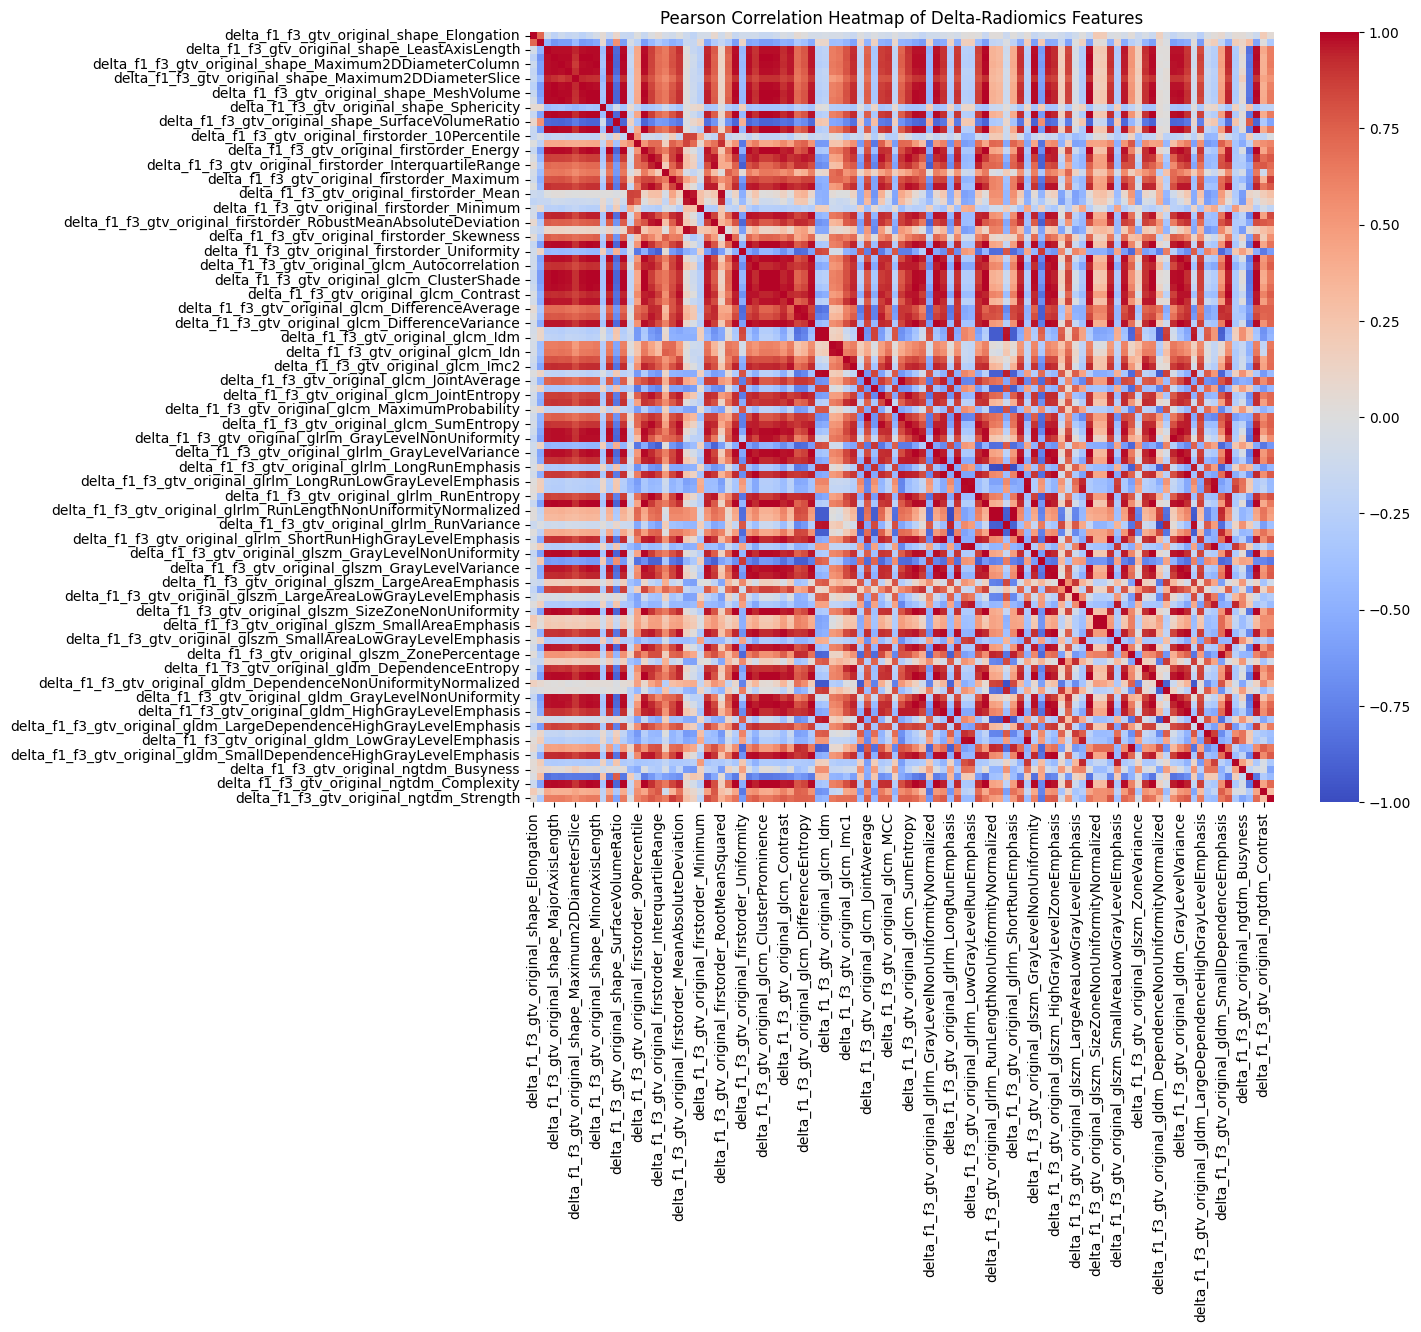

In [60]:
delta_f1_f3_gtv_correlation_matrix = disp_pearson_corr(delta_f1_f3_gtv_mean_added_df)

### Identify Highly Correlated Features

In [61]:
delta_f1_f3_gtv_highly_correlated_pairs = get_highly_corr_features(delta_f1_f3_gtv_correlation_matrix)

There are 2230 highly correlated features (correlation superior to 0.9): 
delta_f1_f3_gtv_original_shape_LeastAxisLength and delta_f1_f3_gtv_original_shape_MajorAxisLength have a correlation of 0.98
delta_f1_f3_gtv_original_shape_LeastAxisLength and delta_f1_f3_gtv_original_shape_Maximum2DDiameterColumn have a correlation of 0.98
delta_f1_f3_gtv_original_shape_LeastAxisLength and delta_f1_f3_gtv_original_shape_Maximum2DDiameterRow have a correlation of 0.98
delta_f1_f3_gtv_original_shape_LeastAxisLength and delta_f1_f3_gtv_original_shape_Maximum2DDiameterSlice have a correlation of 0.94
delta_f1_f3_gtv_original_shape_LeastAxisLength and delta_f1_f3_gtv_original_shape_Maximum3DDiameter have a correlation of 0.98
delta_f1_f3_gtv_original_shape_LeastAxisLength and delta_f1_f3_gtv_original_shape_MeshVolume have a correlation of 0.99
delta_f1_f3_gtv_original_shape_LeastAxisLength and delta_f1_f3_gtv_original_shape_MinorAxisLength have a correlation of 0.99
delta_f1_f3_gtv_original_shape_Lea

### Drop highly correlated features 


In [62]:
delta_f1_f3_gtv_mean_added_df_reduced = remove_highly_corr_features(delta_f1_f3_gtv_highly_correlated_pairs, delta_f1_f3_gtv_mean_added_df)


75 features dropped. 
Reduced DataFrame has 32 features.


## F2/F1 ratio on PTV

In [34]:
# define columns of simu/F1 delta rad next dataframe 
new_feature_list = ['delta_f1_f2_ptv_' + x for x in features_list]
print(new_feature_list)

['delta_f1_f2_ptv_original_shape_Elongation', 'delta_f1_f2_ptv_original_shape_Flatness', 'delta_f1_f2_ptv_original_shape_LeastAxisLength', 'delta_f1_f2_ptv_original_shape_MajorAxisLength', 'delta_f1_f2_ptv_original_shape_Maximum2DDiameterColumn', 'delta_f1_f2_ptv_original_shape_Maximum2DDiameterRow', 'delta_f1_f2_ptv_original_shape_Maximum2DDiameterSlice', 'delta_f1_f2_ptv_original_shape_Maximum3DDiameter', 'delta_f1_f2_ptv_original_shape_MeshVolume', 'delta_f1_f2_ptv_original_shape_MinorAxisLength', 'delta_f1_f2_ptv_original_shape_Sphericity', 'delta_f1_f2_ptv_original_shape_SurfaceArea', 'delta_f1_f2_ptv_original_shape_SurfaceVolumeRatio', 'delta_f1_f2_ptv_original_shape_VoxelVolume', 'delta_f1_f2_ptv_original_firstorder_10Percentile', 'delta_f1_f2_ptv_original_firstorder_90Percentile', 'delta_f1_f2_ptv_original_firstorder_Energy', 'delta_f1_f2_ptv_original_firstorder_Entropy', 'delta_f1_f2_ptv_original_firstorder_InterquartileRange', 'delta_f1_f2_ptv_original_firstorder_Kurtosis', '

In [35]:
# Créer le DataFrame
data, error_patients = get_data_from_csv('_mridian_ttt_1_ptv.nii', '_mridian_ttt_2_ptv.nii', patients_list, pyrad_results_folder)
print("Patient indexes with errors: ", error_patients)

delta_f1_f2_ptv_df = pd.DataFrame(data, index=patients_list, columns=new_feature_list)

Patient indexes with errors:  ['62', '74', '80', '82', '84', '85']


In [36]:
delta_f1_f2_ptv_df

,delta_f1_f2_ptv_original_shape_Elongation,delta_f1_f2_ptv_original_shape_Flatness,delta_f1_f2_ptv_original_shape_LeastAxisLength,delta_f1_f2_ptv_original_shape_MajorAxisLength,delta_f1_f2_ptv_original_shape_Maximum2DDiameterColumn,delta_f1_f2_ptv_original_shape_Maximum2DDiameterRow,delta_f1_f2_ptv_original_shape_Maximum2DDiameterSlice,delta_f1_f2_ptv_original_shape_Maximum3DDiameter,delta_f1_f2_ptv_original_shape_MeshVolume,delta_f1_f2_ptv_original_shape_MinorAxisLength,...,delta_f1_f2_ptv_original_gldm_LargeDependenceLowGrayLevelEmphasis,delta_f1_f2_ptv_original_gldm_LowGrayLevelEmphasis,delta_f1_f2_ptv_original_gldm_SmallDependenceEmphasis,delta_f1_f2_ptv_original_gldm_SmallDependenceHighGrayLevelEmphasis,delta_f1_f2_ptv_original_gldm_SmallDependenceLowGrayLevelEmphasis,delta_f1_f2_ptv_original_ngtdm_Busyness,delta_f1_f2_ptv_original_ngtdm_Coarseness,delta_f1_f2_ptv_original_ngtdm_Complexity,delta_f1_f2_ptv_original_ngtdm_Contrast,delta_f1_f2_ptv_original_ngtdm_Strength
Patient 1,0.997713,0.995441,0.997834,1.002404,1.010339,1.000000,1.000000,1.000000,0.992180,1.000112,...,0.905649,0.815703,0.937941,1.000926,0.723097,0.931744,1.014736,0.979375,0.933465,1.053193
Patient 2,1.008381,0.989574,0.987426,0.997829,1.035324,1.000000,1.000000,1.000000,0.963870,1.006192,...,0.916595,1.057558,1.127559,1.264521,1.105538,0.877283,1.022667,1.338681,1.168827,1.235492
Patient 3,0.997055,0.998848,1.005401,1.006560,1.020444,1.000000,1.000000,1.019433,1.010276,1.003596,...,0.458197,0.558163,1.214529,1.832261,0.582783,0.588906,0.984271,2.048130,1.002995,1.764386
Patient 4,1.040382,1.001807,0.977338,0.975576,1.019066,0.962148,0.985057,0.981021,1.128919,1.014972,...,1.549652,1.409172,0.903747,0.793627,1.219220,1.214328,0.904976,0.953995,0.931048,0.924359
Patient 5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.979801,0.934007,0.985650,0.961535,1.014129,0.778316,0.995355,1.296007,0.756195,1.383786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Patient 82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient 83,0.982441,0.987004,0.996245,1.009363,1.020385,0.992435,1.000000,1.013665,0.999818,0.991639,...,0.725224,0.908827,1.168637,1.358795,1.107699,0.816556,0.958847,1.455252,1.030974,1.279732
Patient 84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient 85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
delta_f1_f2_ptv_df.to_csv(pyrad_results_folder+'ratio_f2_f1_ptv_with_nan.csv') # Save table with NaN values 

In [38]:
delta_f1_f2_ptv_df.isnull().sum() # observe nan values

delta_f1_f2_ptv_original_shape_Elongation                 6
delta_f1_f2_ptv_original_shape_Flatness                   6
delta_f1_f2_ptv_original_shape_LeastAxisLength            6
delta_f1_f2_ptv_original_shape_MajorAxisLength            6
delta_f1_f2_ptv_original_shape_Maximum2DDiameterColumn    6
                                                         ..
delta_f1_f2_ptv_original_ngtdm_Busyness                   6
delta_f1_f2_ptv_original_ngtdm_Coarseness                 6
delta_f1_f2_ptv_original_ngtdm_Complexity                 6
delta_f1_f2_ptv_original_ngtdm_Contrast                   6
delta_f1_f2_ptv_original_ngtdm_Strength                   6
Length: 107, dtype: int64

In [39]:
delta_f1_f2_ptv_mean_added_df = delta_f1_f2_ptv_df.fillna(delta_f1_f2_ptv_df.mean()) # replace nan values by mean of the column 
delta_f1_f2_ptv_mean_added_df.isnull().values.any()

False

In [40]:
delta_f1_f2_ptv_mean_added_df.to_csv(pyrad_results_folder+'ratio_f2_f1_ptv.csv') # save table with NaN replaced by mean values

### Assess multi-collinearity

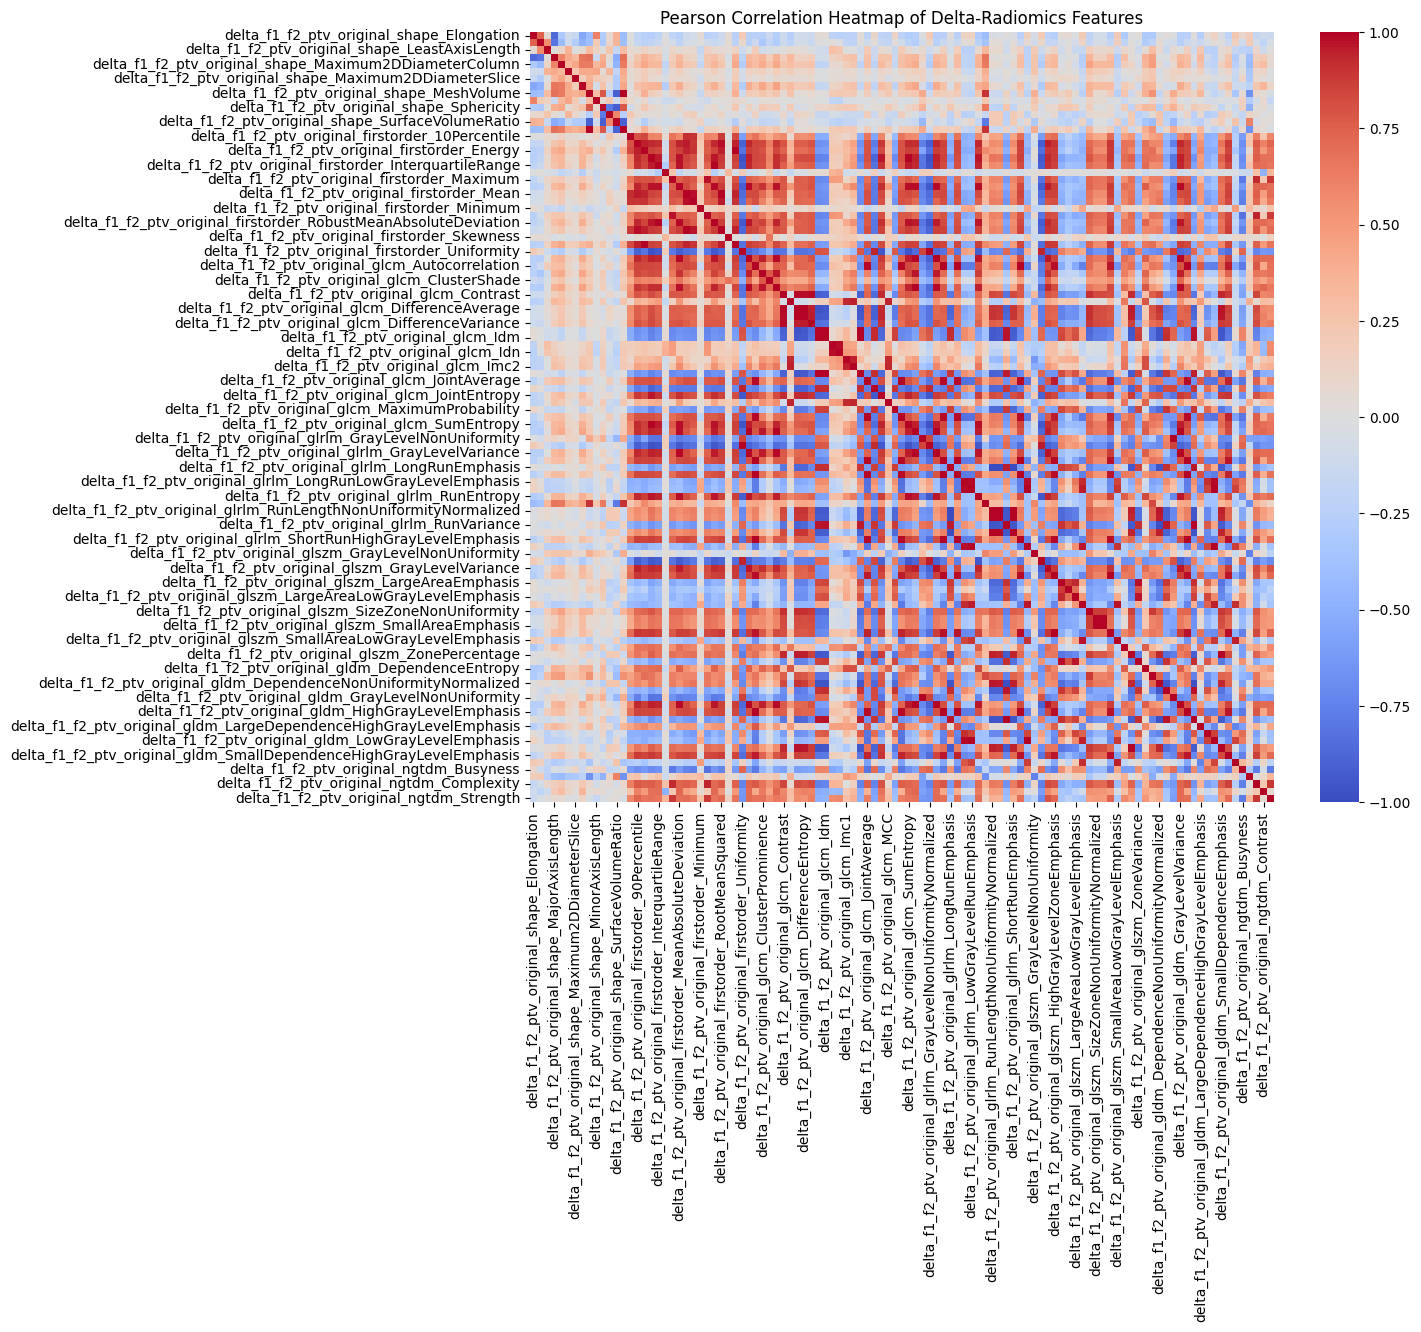

In [66]:
delta_f1_f2_ptv_correlation_matrix = disp_pearson_corr(delta_f1_f2_ptv_mean_added_df)

### Identify Highly Correlated Features

In [67]:
delta_f1_f2_ptv_highly_correlated_pairs = get_highly_corr_features(delta_f1_f2_ptv_correlation_matrix)

There are 652 highly correlated features (correlation superior to 0.9): 
delta_f1_f2_ptv_original_shape_MeshVolume and delta_f1_f2_ptv_original_shape_SurfaceVolumeRatio have a correlation of -0.91
delta_f1_f2_ptv_original_shape_MeshVolume and delta_f1_f2_ptv_original_shape_VoxelVolume have a correlation of 1.00
delta_f1_f2_ptv_original_shape_MeshVolume and delta_f1_f2_ptv_original_glrlm_RunLengthNonUniformity have a correlation of 0.90
delta_f1_f2_ptv_original_shape_Sphericity and delta_f1_f2_ptv_original_shape_SurfaceVolumeRatio have a correlation of -0.91
delta_f1_f2_ptv_original_shape_SurfaceVolumeRatio and delta_f1_f2_ptv_original_shape_MeshVolume have a correlation of -0.91
delta_f1_f2_ptv_original_shape_SurfaceVolumeRatio and delta_f1_f2_ptv_original_shape_Sphericity have a correlation of -0.91
delta_f1_f2_ptv_original_shape_SurfaceVolumeRatio and delta_f1_f2_ptv_original_shape_VoxelVolume have a correlation of -0.91
delta_f1_f2_ptv_original_shape_VoxelVolume and delta_f1_f2_ptv_

### Drop highly correlated features 


In [68]:
delta_f1_f2_ptv_mean_added_df_reduced = remove_highly_corr_features(delta_f1_f2_ptv_highly_correlated_pairs, delta_f1_f2_ptv_mean_added_df)


65 features dropped. 
Reduced DataFrame has 42 features.


## F3/F1 ratio on PTV 

In [41]:
# define columns of simu/F1 delta rad next dataframe 
new_feature_list = ['delta_f1_f3_ptv_' + x for x in features_list]
print(new_feature_list)

['delta_f1_f3_ptv_original_shape_Elongation', 'delta_f1_f3_ptv_original_shape_Flatness', 'delta_f1_f3_ptv_original_shape_LeastAxisLength', 'delta_f1_f3_ptv_original_shape_MajorAxisLength', 'delta_f1_f3_ptv_original_shape_Maximum2DDiameterColumn', 'delta_f1_f3_ptv_original_shape_Maximum2DDiameterRow', 'delta_f1_f3_ptv_original_shape_Maximum2DDiameterSlice', 'delta_f1_f3_ptv_original_shape_Maximum3DDiameter', 'delta_f1_f3_ptv_original_shape_MeshVolume', 'delta_f1_f3_ptv_original_shape_MinorAxisLength', 'delta_f1_f3_ptv_original_shape_Sphericity', 'delta_f1_f3_ptv_original_shape_SurfaceArea', 'delta_f1_f3_ptv_original_shape_SurfaceVolumeRatio', 'delta_f1_f3_ptv_original_shape_VoxelVolume', 'delta_f1_f3_ptv_original_firstorder_10Percentile', 'delta_f1_f3_ptv_original_firstorder_90Percentile', 'delta_f1_f3_ptv_original_firstorder_Energy', 'delta_f1_f3_ptv_original_firstorder_Entropy', 'delta_f1_f3_ptv_original_firstorder_InterquartileRange', 'delta_f1_f3_ptv_original_firstorder_Kurtosis', '

In [42]:
# Créer le DataFrame
data, error_patients = get_data_from_csv('_mridian_ttt_1_ptv.nii', '_mridian_ttt_3_ptv.nii', patients_list, pyrad_results_folder)
print("Patient indexes with errors: ", error_patients)

delta_f1_f3_ptv_df = pd.DataFrame(data, index=patients_list, columns=new_feature_list)

Patient indexes with errors:  ['38', '56', '63', '74', '80']


In [43]:
delta_f1_f3_ptv_df

,delta_f1_f3_ptv_original_shape_Elongation,delta_f1_f3_ptv_original_shape_Flatness,delta_f1_f3_ptv_original_shape_LeastAxisLength,delta_f1_f3_ptv_original_shape_MajorAxisLength,delta_f1_f3_ptv_original_shape_Maximum2DDiameterColumn,delta_f1_f3_ptv_original_shape_Maximum2DDiameterRow,delta_f1_f3_ptv_original_shape_Maximum2DDiameterSlice,delta_f1_f3_ptv_original_shape_Maximum3DDiameter,delta_f1_f3_ptv_original_shape_MeshVolume,delta_f1_f3_ptv_original_shape_MinorAxisLength,...,delta_f1_f3_ptv_original_gldm_LargeDependenceLowGrayLevelEmphasis,delta_f1_f3_ptv_original_gldm_LowGrayLevelEmphasis,delta_f1_f3_ptv_original_gldm_SmallDependenceEmphasis,delta_f1_f3_ptv_original_gldm_SmallDependenceHighGrayLevelEmphasis,delta_f1_f3_ptv_original_gldm_SmallDependenceLowGrayLevelEmphasis,delta_f1_f3_ptv_original_ngtdm_Busyness,delta_f1_f3_ptv_original_ngtdm_Coarseness,delta_f1_f3_ptv_original_ngtdm_Complexity,delta_f1_f3_ptv_original_ngtdm_Contrast,delta_f1_f3_ptv_original_ngtdm_Strength
Patient 1,1.000985,1.002593,1.008825,1.006216,1.010339,1.000000,1.004929,1.003271,1.020848,1.007207,...,1.189051,1.121621,0.949910,0.912293,1.100036,0.965817,0.982015,1.096695,0.898545,1.172999
Patient 2,0.944856,0.950793,0.997169,1.048776,1.043498,1.014052,1.000000,1.012293,1.007965,0.990943,...,1.154660,1.126994,1.056307,1.094451,1.094240,1.037168,1.017368,1.130792,1.155924,1.116238
Patient 3,1.007647,1.003366,1.011340,1.007948,1.030142,1.000000,1.000000,1.023465,1.033898,1.015656,...,1.085288,1.045940,1.072340,1.087493,1.023051,0.950466,0.965890,1.284925,0.977739,1.296455
Patient 4,0.951558,0.928159,0.960842,1.035212,0.987840,0.965245,0.987605,1.011624,1.132852,0.985065,...,1.116642,1.242040,0.993250,1.044654,1.177688,1.101220,0.869977,1.147781,1.091204,0.922680
Patient 5,1.001611,0.971314,0.988639,1.017837,1.025557,1.000000,1.000000,1.000000,1.011464,1.019477,...,0.593868,0.664969,1.210198,1.835719,0.796361,0.660859,1.038348,1.853444,1.220883,1.655685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Patient 82,1.006146,1.016737,1.018562,1.001795,1.013499,1.000000,1.011943,1.004906,1.027907,1.007952,...,0.647421,0.828305,1.079216,1.322211,0.968192,0.786569,1.030317,1.346820,0.985486,1.409628
Patient 83,0.982146,0.971473,0.994837,1.024051,1.020385,1.014787,1.008612,1.013665,1.017289,1.005768,...,0.923808,1.046295,1.026289,1.004469,1.136957,1.088846,0.970848,0.896578,1.126834,0.792074
Patient 84,1.005228,0.999430,0.998629,0.999198,1.000000,1.000000,1.000000,1.000000,1.001180,1.004421,...,0.471607,0.596435,1.065248,1.242462,0.658154,0.755508,0.965047,1.320634,0.880388,1.203151
Patient 85,0.994192,1.000425,1.011227,1.010798,1.000000,1.017973,1.000000,1.000000,1.022751,1.004926,...,0.673280,0.548540,0.908516,1.192217,0.470367,0.720228,0.987019,1.090881,0.734835,1.197460


In [44]:
delta_f1_f3_ptv_df.to_csv(pyrad_results_folder+'ratio_f3_f1_ptv_with_nan.csv') # Save table with NaN values 

In [45]:
delta_f1_f3_ptv_df.isnull().sum() # observe nan values

delta_f1_f3_ptv_original_shape_Elongation                 5
delta_f1_f3_ptv_original_shape_Flatness                   5
delta_f1_f3_ptv_original_shape_LeastAxisLength            5
delta_f1_f3_ptv_original_shape_MajorAxisLength            5
delta_f1_f3_ptv_original_shape_Maximum2DDiameterColumn    5
                                                         ..
delta_f1_f3_ptv_original_ngtdm_Busyness                   5
delta_f1_f3_ptv_original_ngtdm_Coarseness                 5
delta_f1_f3_ptv_original_ngtdm_Complexity                 5
delta_f1_f3_ptv_original_ngtdm_Contrast                   5
delta_f1_f3_ptv_original_ngtdm_Strength                   5
Length: 107, dtype: int64

In [46]:
delta_f1_f3_ptv_mean_added_df = delta_f1_f3_ptv_df.fillna(delta_f1_f3_ptv_df.mean()) # replace nan values by mean of the column 
delta_f1_f3_ptv_mean_added_df.isnull().values.any()

False

In [47]:
delta_f1_f3_ptv_mean_added_df.to_csv(pyrad_results_folder+'ratio_f3_f1_ptv.csv') # save table with NaN replaced by mean values

### Assess multi-collinearity

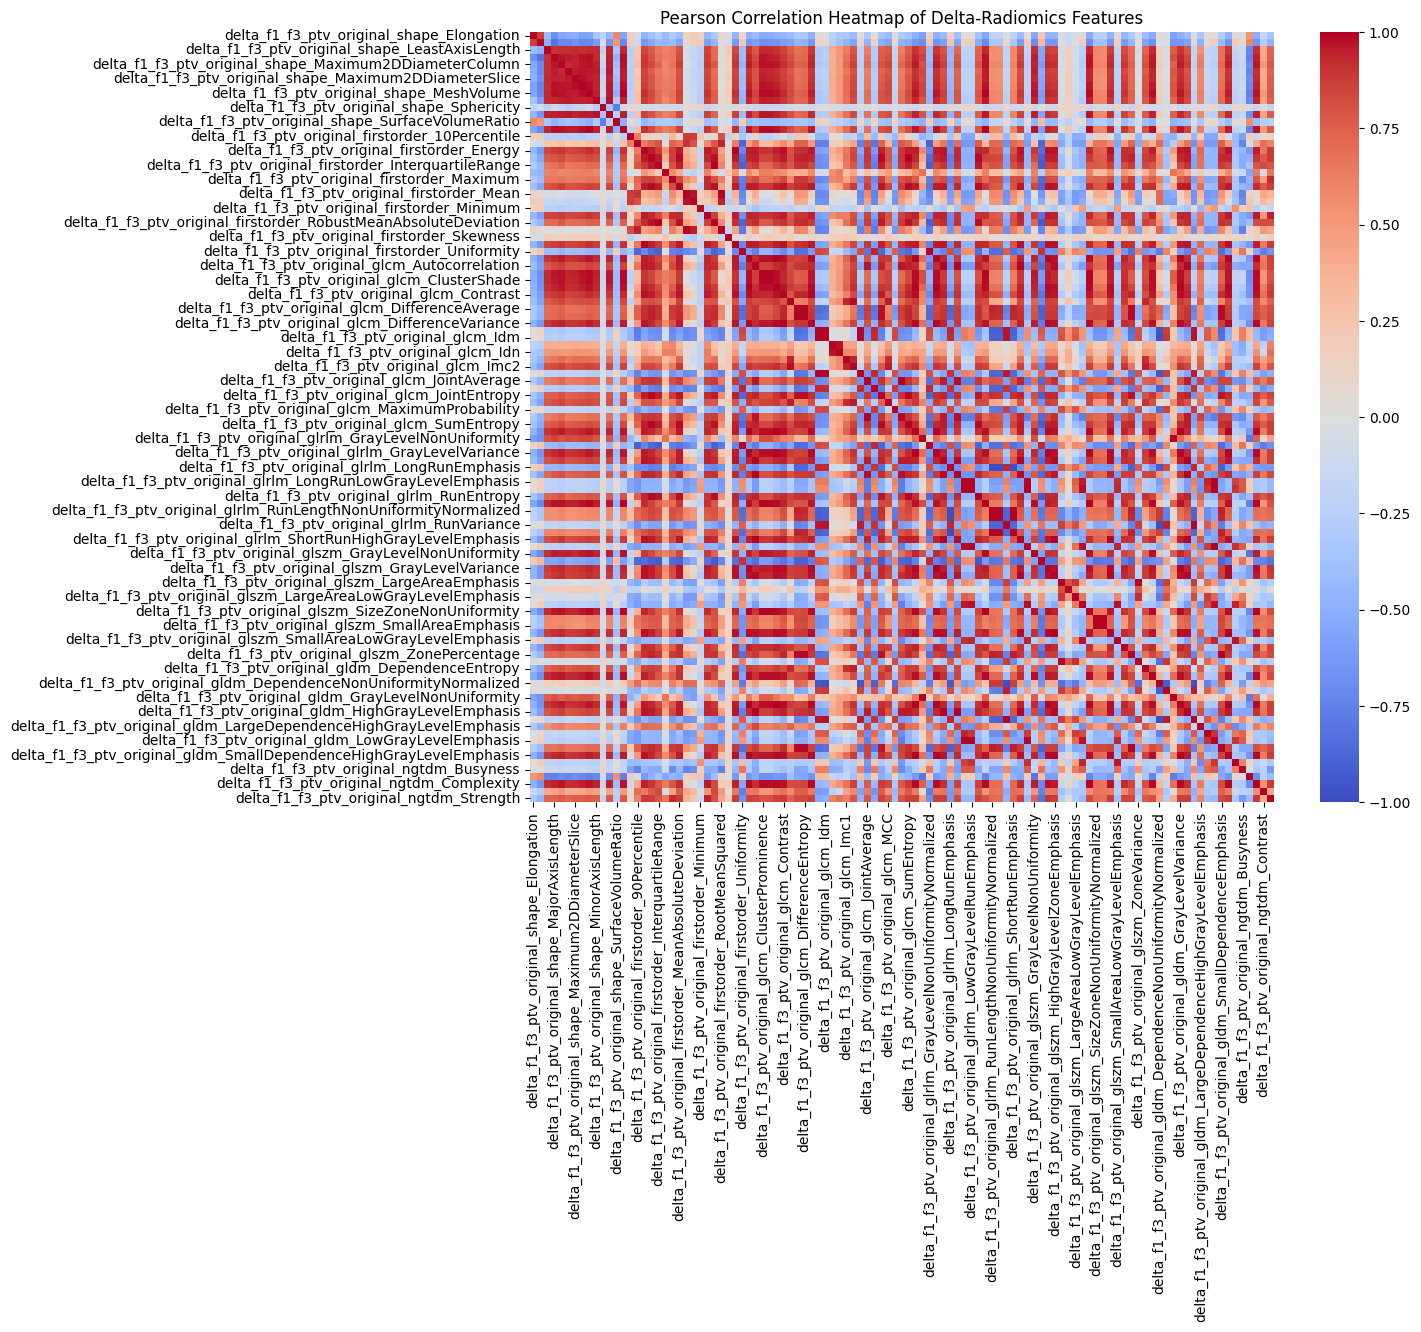

In [63]:
delta_f1_f3_ptv_correlation_matrix = disp_pearson_corr(delta_f1_f3_ptv_mean_added_df)

### Identify Highly Correlated Features

In [64]:
delta_f1_f3_ptv_highly_correlated_pairs = get_highly_corr_features(delta_f1_f3_ptv_correlation_matrix)

There are 1624 highly correlated features (correlation superior to 0.9): 
delta_f1_f3_ptv_original_shape_LeastAxisLength and delta_f1_f3_ptv_original_shape_Maximum2DDiameterColumn have a correlation of 0.92
delta_f1_f3_ptv_original_shape_LeastAxisLength and delta_f1_f3_ptv_original_shape_Maximum2DDiameterRow have a correlation of 0.92
delta_f1_f3_ptv_original_shape_LeastAxisLength and delta_f1_f3_ptv_original_shape_Maximum2DDiameterSlice have a correlation of 0.92
delta_f1_f3_ptv_original_shape_LeastAxisLength and delta_f1_f3_ptv_original_shape_Maximum3DDiameter have a correlation of 0.92
delta_f1_f3_ptv_original_shape_LeastAxisLength and delta_f1_f3_ptv_original_shape_MeshVolume have a correlation of 0.94
delta_f1_f3_ptv_original_shape_LeastAxisLength and delta_f1_f3_ptv_original_shape_MinorAxisLength have a correlation of 0.93
delta_f1_f3_ptv_original_shape_LeastAxisLength and delta_f1_f3_ptv_original_shape_SurfaceArea have a correlation of 0.94
delta_f1_f3_ptv_original_shape_LeastAx

### Drop highly correlated features 


In [65]:
delta_f1_f3_ptv_mean_added_df_reduced = remove_highly_corr_features(delta_f1_f3_ptv_highly_correlated_pairs, delta_f1_f3_ptv_mean_added_df)


74 features dropped. 
Reduced DataFrame has 33 features.
